In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

Appending key for api.wandb.ai to your netrc file: /Users/guydavidson/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath
import matplotlib.gridspec as gridspec

import pickle
import tabulate
import wandb
from collections import namedtuple

import meta_learning_data_analysis as analysis
import meta_learning_analysis_plots as plots

In [4]:
np.set_printoptions(linewidth=160)
# Avoid escaping any latex characters
tabulate.LATEX_ESCAPE_RULES = {}

MIN_FONT_SIZE = 14
LABELS_FONT_SIZE = 20
TITLE_FONT_SIZE = 24

matplotlib.rcParams.update({'font.size': MIN_FONT_SIZE})
FONT_DICT = dict(fontsize=LABELS_FONT_SIZE) 
TITLE_FONT_DICT = dict(fontsize=TITLE_FONT_SIZE)

PER_PLOT_WIDTH = 6

QUERY_ORDINAL_POSITION_COMORLAP= 'cool'
NUM_TIMES_TRAINED_COLORMAP = 'copper'

In [5]:
cache = analysis.refresh_cache()
print(cache.keys())

# query_mod_replications = cache['query_mod_replications']
control_analyses = cache['control_analyses']
six_replications_updated_analyses = cache['six_replications_updated_analyses']
control_updated_analyses = cache['updated_control_analyses']
query_mod_updated_analyses = cache['query_mod_updated_analyses']

# MAML
maml_analyses = cache['maml_analyses']
maml_meta_test_analyses = cache['maml_meta_test_analyses']
balanced_batches_analyses = cache['balanced_batches_analyses']

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data', 'preliminary_maml_analyses', 'baseline_maml_comparison_analyses', 'maml_analyses', 'maml_alpha_0_analyses', 'maml_meta_test_analyses', 'balanced_batches_analyses'])


-----

# Basic plots for regular data, and MAML-related conditions

## Examples to criterion

log(y) = -1.603 log(x) + 11.71
log(y) = -1.8 log(x) + 13.2
log(y) = -1.606 log(x) + 11.7
log(y) = -1.8 log(x) + 13.2
log(y) = -1.869 log(x) + 11.89
log(y) = -1.77 log(x) + 13.0
log(y) = -1.642 log(x) + 11.54
log(y) = -2.03 log(x) + 13.4


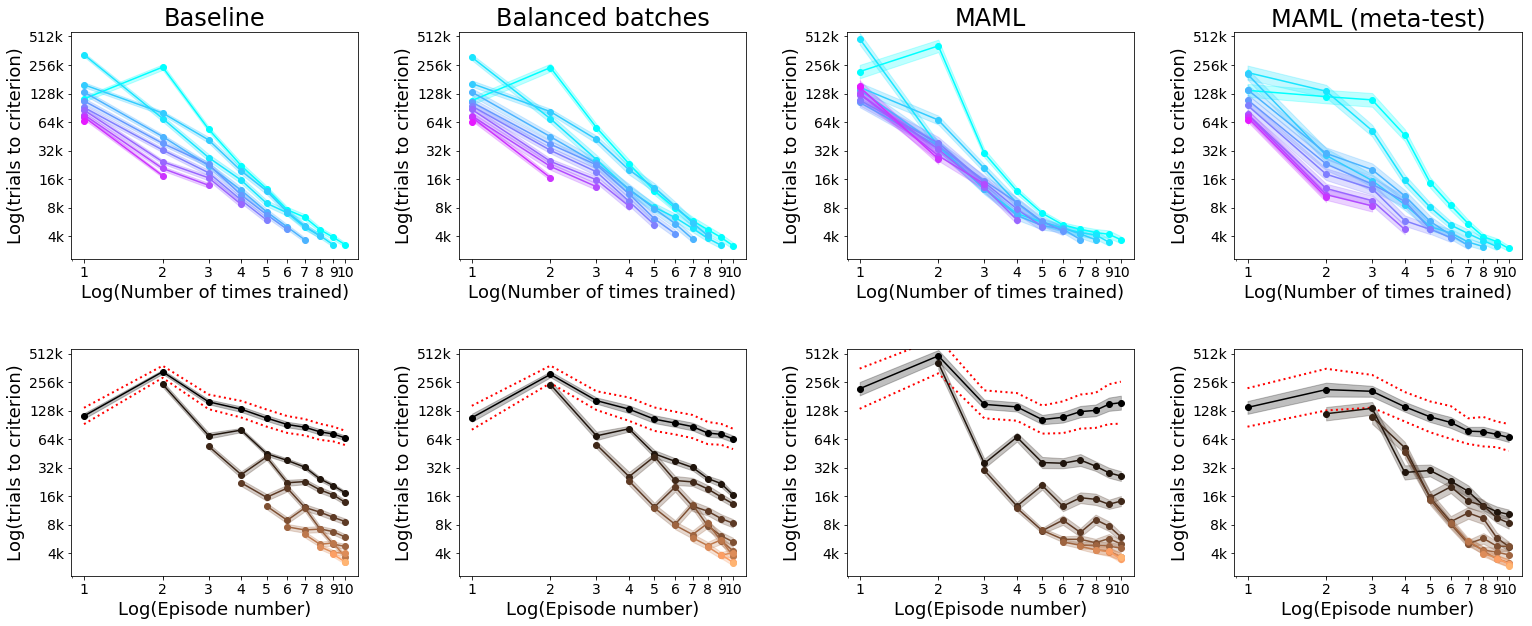

In [18]:
NROWS = 2
NCOLS = 4
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 10

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

replication_n = np.array((10, 10, 10, 30))
LOG_PLOT_YLIM = (7.75, 13.25)

for index, (data, sem_n, title) in enumerate(zip((six_replications_updated_analyses, balanced_batches_analyses,
                                                 maml_analyses, maml_meta_test_analyses),
                                                 (replication_n * 6, replication_n * 3,
                                                  replication_n * 3, replication_n * 2),
                                                 ('Baseline', 'Balanced batches',
                                                  'MAML', 'MAML (meta-test)'))):
    axes = (plt.subplot(NROWS, NCOLS, index + 1), plt.subplot(NROWS, NCOLS, NCOLS + index + 1))
    plots.plot_processed_results_all_dimensions(data, data_index=1, 
                                                title='', num_times_trained_title=title,
                                                ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=sem_n, shade_error=True,
                                                font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                                dimension_names=('',), dimension_indices=(3,),
                                                num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                                title_font_dict=TITLE_FONT_DICT, external_axes=axes,
                                                plot_regression='print')



plt.show()

## Accuracy after 22.5k examples

y = 0.03107 x + 0.7757
y = 0.028 x + 0.704
y = 0.03091 x + 0.7773
y = 0.0282 x + 0.703
y = 0.03183 x + 0.7404
y = 0.0144 x + 0.767
y = 0.03061 x + 0.7734
y = 0.0314 x + 0.676


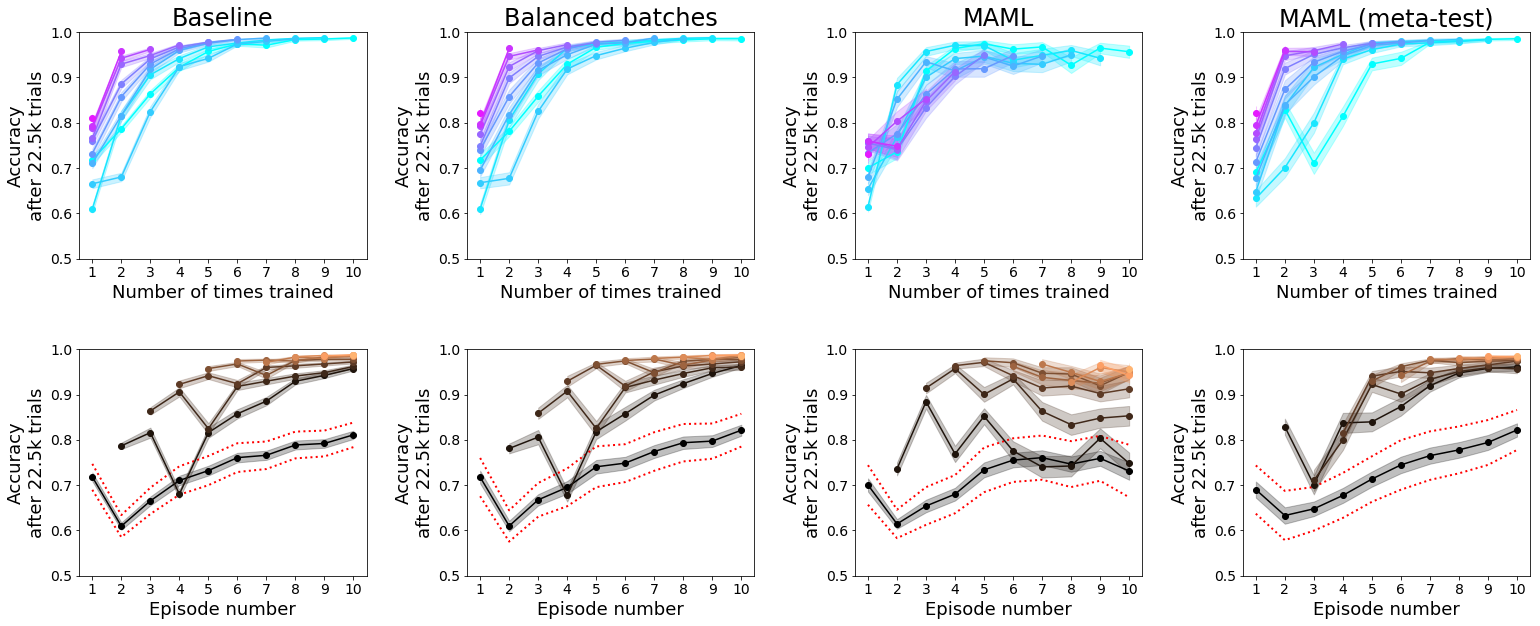

In [19]:
NROWS = 2
NCOLS = 4
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 10

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

replication_n = np.array((10, 10, 10, 30))
ACCURACY_PLOT_YLIM = (0.5, 1.0)

for index, (data, sem_n, title) in enumerate(zip((six_replications_updated_analyses, balanced_batches_analyses,
                                                 maml_analyses, maml_meta_test_analyses),
                                                 (replication_n * 6, replication_n * 3,
                                                  replication_n * 3, replication_n * 2),
                                                 ('Baseline', 'Balanced batches',
                                                  'MAML', 'MAML (meta-test)'))):
    axes = (plt.subplot(NROWS, NCOLS, index + 1), plt.subplot(NROWS, NCOLS, NCOLS + index + 1))
    plots.plot_processed_results_all_dimensions(data, data_index=3, 
                                                title='', num_times_trained_title=title,
                                                ylim=ACCURACY_PLOT_YLIM, sem_n=sem_n, shade_error=True, plot_y_label='Accuracy\nafter 22.5k trials',
                                                font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                                dimension_names=('',), dimension_indices=(3,),
                                                num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                                title_font_dict=TITLE_FONT_DICT, external_axes=axes,
                                                plot_regression='print')



plt.show()


----

Trying some sign tests

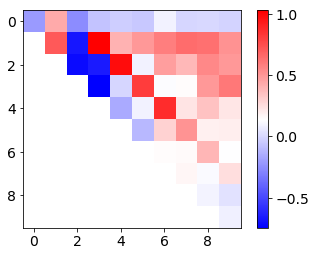

In [12]:



diff = six_replications_updated_analyses.combined.log_examples.mean - maml_meta_test_analyses.combined.log_examples.mean

plt.imshow(diff, 'bwr')
plt.colorbar()